**Homework 19.**

In this assignment you will train a Neural Network to recognize handwritten numbers. Begin by importing the older libraries we've used:

In [1]:
import numpy as np
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split

Now import the dataset:

In [2]:
#Import data and target:
from sklearn.datasets import load_digits
digits=load_digits()
X=digits.data
y=digits.target

X.shape,y.shape

((1797, 64), (1797,))

You should see that there are 1797 observation in X, and each has 64 features. The features are the pixel values in an 8x8 image. For example, the pixel values for image 100 are given by:

In [3]:
X[100,:]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

We can see what this data represents by reshaping it into an array of shape (8,8) and visualizing with the imshow command from matplotlib.pyplot:

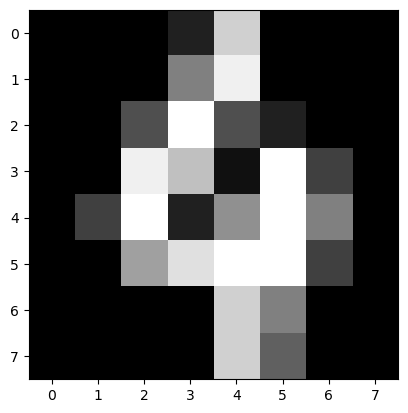

In [4]:
imshow(np.array(X[100,:]).reshape((8,8)),cmap='gray')

This is a (very pixelized) image of the numeral 4. We can confirm this by looking at the 100th value of the target vector y:

In [5]:
y[100]

4

Our goal is to create and train a neural network that takes in pixel data and predicts the variable y, telling us what numeral the image represents. To this end, it will be helpful to normalize pixel values to the range (-1,1):

In [6]:
X=(X-8)/8 #normalization--each pixel was in range 0-16

In [7]:
X[100,:]

array([-1.   , -1.   , -1.   , -0.75 ,  0.625, -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   ,  0.   ,  0.875, -1.   , -1.   , -1.   ,
       -1.   , -1.   , -0.375,  1.   , -0.375, -0.75 , -1.   , -1.   ,
       -1.   , -1.   ,  0.875,  0.5  , -0.875,  1.   , -0.5  , -1.   ,
       -1.   , -0.5  ,  1.   , -0.75 ,  0.125,  1.   ,  0.   , -1.   ,
       -1.   , -1.   ,  0.25 ,  0.75 ,  1.   ,  1.   , -0.5  , -1.   ,
       -1.   , -1.   , -1.   , -1.   ,  0.625,  0.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   ,  0.625, -0.25 , -1.   , -1.   ])

We now do a train/test split. As usual, we'll train our model on the train set, and evaluate its performance on the test set.

In [8]:
#Train/test split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8)

Next we import the necessary libraries from pytorch, and convert all data to pytorch tensors:

In [9]:
import torch
from torch import nn
from torch.optim import Adam

Xtrain=torch.tensor(Xtrain,dtype=torch.float32)
Xtest=torch.tensor(Xtest,dtype=torch.float32)
ytrain=torch.tensor(ytrain)
ytest=torch.tensor(ytest)

Now, build a neural network. Your network should take in observations with 64 feaures, and generate an output of 10 numbers (one for each possible numeral that might be represented by the image). Use two hidden layers with 32 and 16 neurons, respectively. After each Linear layer, add a ReLU layer, Batch Normalization, and 10% dropout.

In [28]:
#Build the network:
digitsNN=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.BatchNorm1d(32),
    nn.Dropout(p=0.1),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.BatchNorm1d(16),
    nn.Dropout(p=0.1),
    nn.Linear(16,10)
)

In [29]:
digitsNN.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.1, inplace=False)
  (8): Linear(in_features=16, out_features=10, bias=True)
)>

Instantiate an Adam optimizer to use with your model, with a learning rate of 0.01.

In [30]:
optimizer=Adam(digitsNN.parameters(), 0.01)

Write a training loop to train your model, using 1000 epochs of batch gradient descent, with batches of size 100.

In [38]:
n_epochs=1000
N = Xtrain.shape[0]  # total number of observations in training data
batch_size=100

for epoch in range(n_epochs):
  # Shuffle the indices
  indices = torch.randperm(N)

  # Create mini-batches
  for i in range(0, N, batch_size):
    batch_indices = indices[i:i+batch_size]
    batch_X = Xtrain[batch_indices]
    batch_y = ytrain[batch_indices]

    optimizer.zero_grad() # zero the gradients out
    predictions = digitsNN(batch_X) # predict on batch_X data
    # print(batch_X.shape)
    # print(predictions.shape); print(batch_y.shape)
    CEloss = torch.nn.CrossEntropyLoss()(predictions, batch_y) # Calculate the loss
    # CEloss=((predictions-batch_y)**2).mean() #This is the same!!
    CEloss.backward() # Take gradient of the loss
    optimizer.step() # Step in direction of the negative gradient towards minima

  if epoch%100==0:
    print(f"epoch: {epoch}, loss: {CEloss.item()}")

epoch: 0, loss: 0.9331995248794556
epoch: 100, loss: 0.06032911688089371
epoch: 200, loss: 0.0055732447654008865
epoch: 300, loss: 0.09864939004182816
epoch: 400, loss: 0.00040000007720664144
epoch: 500, loss: 0.000490463396999985
epoch: 600, loss: 0.183402419090271
epoch: 700, loss: 0.07610994577407837
epoch: 800, loss: 0.0002705623337533325
epoch: 900, loss: 0.004486870486289263


Next, report the accuracy of your model on the test set. Note the use of `with torch.no_grad()` here, because there is no longer a need to track gradients once our model is trained.

In [56]:
with torch.no_grad():
  y_pred=digitsNN(Xtest) #generate predictions for the test set.
accuracy= (torch.sum(torch.argmax(y_pred,dim=1) == ytest) / ytest.shape[0])
accuracy*100


tensor(96.3889)

Copy and paste this into homework19gradescope.ipynb, export that as a python file, and upload to gradescope.